In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
!pip install -q "tqdm>=4.36.1"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import zipfile
import pandas as pd
import numpy as np
import pickle
from sklearn.utils import class_weight
from keras import regularizers
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from tensorflow.keras import models
from google.colab import drive
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow_datasets as tfds
import tqdm
import tensorflow_addons as tfa
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
import os
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import shutil
import matplotlib.pyplot as plt
import cv2 as cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/dataset_Pretrained_200/trainingSet.zip" -d "/content"

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/datasets_Pretrained_2k/trainingSet.zip" -d "/content"

replace /content/content/trainingSet/4/40673_right.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/dataset_Pretrained_200/validationSet.zip" -d "/content"

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/testSet.zip" -d "/content"

In [ ]:
!rm -r "/content/trainingSet/"
!rm -r "/content/testSet/"
!rm -r "/content/validationSet/"

rm: cannot remove '/content/trainingSet/': No such file or directory
rm: cannot remove '/content/testSet/': No such file or directory
rm: cannot remove '/content/validationSet/': No such file or directory


# Import training validation test

In [ ]:
BATCH_SIZE = 100
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [ ]:
training_dir = PATH = '/content/trainingSet/'
validation_dir = PATH = '/content/validationSet/'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)


Found 1000 files belonging to 5 classes.
Found 3510 files belonging to 5 classes.


In [ ]:
test_dir = PATH = '/content/testSet/'

test_dataset = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("vertical"),
  layers.RandomFlip("horizontal"),
  layers.RandomZoom(0.1, fill_mode="constant", fill_value=0.0),
    layers.RandomRotation(factor=1, fill_mode="constant", fill_value=0.0),
  ]
)

# Define conv_base

In [ ]:
conv_base = keras.applications.ResNet50V2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)
)

94683136/94668760 [==============================] - 0s 0us/step


In [ ]:
conv_base.trainable = False

In [ ]:
conv_base.summary()


Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

 ### Exp 1

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
inputs = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu') (x)
x = layers.Dense(128, activation='relu') (x)
x = layers.Dense(64, activation='relu') (x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

 ### Exp 2

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
inputs = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu') (x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

 ### Exp 3

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
inputs = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu') (x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

run_model(model, 0.0003)

Training:   0%|           0/250 ETA: ?s,  ?epochs/s

Epoch 1/250


0/10           ETA: ?s - 

Epoch 1/250
10/10 [==============================] - ETA: 0s - loss: 838.8868 - accuracy: 0.2040
Epoch 00001: val_loss improved from inf to 113.23617, saving model to /content/models/weights.01-113.24.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


10/10 [==============================] - 39s 3s/step - loss: 838.8868 - accuracy: 0.2040 - val_loss: 113.2362 - val_accuracy: 0.0695
Epoch 2/250


0/10           ETA: ?s - 

Epoch 2/250
10/10 [==============================] - ETA: 0s - loss: 10.6999 - accuracy: 0.1930
Epoch 00002: val_loss improved from 113.23617 to 0.70832, saving model to /content/models/weights.02-0.71.hdf5
10/10 [==============================] - 32s 3s/step - loss: 10.6999 - accuracy: 0.1930 - val_loss: 0.7083 - val_accuracy: 0.0202
Epoch 3/250


0/10           ETA: ?s - 

Epoch 3/250
10/10 [==============================] - ETA: 0s - loss: 0.7113 - accuracy: 0.1990
Epoch 00003: val_loss improved from 0.70832 to 0.69347, saving model to /content/models/weights.03-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.7113 - accuracy: 0.1990 - val_loss: 0.6935 - val_accuracy: 0.0199
Epoch 4/250


0/10           ETA: ?s - 

Epoch 4/250
10/10 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.2000
Epoch 00004: val_loss improved from 0.69347 to 0.69258, saving model to /content/models/weights.04-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6914 - accuracy: 0.2000 - val_loss: 0.6926 - val_accuracy: 0.0199
Epoch 5/250


0/10           ETA: ?s - 

Epoch 5/250
10/10 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.2000
Epoch 00005: val_loss improved from 0.69258 to 0.69167, saving model to /content/models/weights.05-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6905 - accuracy: 0.2000 - val_loss: 0.6917 - val_accuracy: 0.0199
Epoch 6/250


0/10           ETA: ?s - 

Epoch 6/250
10/10 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.1920
Epoch 00006: val_loss improved from 0.69167 to 0.69076, saving model to /content/models/weights.06-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6896 - accuracy: 0.1920 - val_loss: 0.6908 - val_accuracy: 0.0695
Epoch 7/250


0/10           ETA: ?s - 

Epoch 7/250
10/10 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.2000
Epoch 00007: val_loss improved from 0.69076 to 0.68986, saving model to /content/models/weights.07-0.69.hdf5
10/10 [==============================] - 31s 3s/step - loss: 0.6887 - accuracy: 0.2000 - val_loss: 0.6899 - val_accuracy: 0.0695
Epoch 8/250


0/10           ETA: ?s - 

Epoch 8/250
10/10 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.2000
Epoch 00008: val_loss improved from 0.68986 to 0.68896, saving model to /content/models/weights.08-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6878 - accuracy: 0.2000 - val_loss: 0.6890 - val_accuracy: 0.0695
Epoch 9/250


0/10           ETA: ?s - 

Epoch 9/250
10/10 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.2000
Epoch 00009: val_loss improved from 0.68896 to 0.68808, saving model to /content/models/weights.09-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6869 - accuracy: 0.2000 - val_loss: 0.6881 - val_accuracy: 0.0695
Epoch 10/250


0/10           ETA: ?s - 

Epoch 10/250
10/10 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.2000
Epoch 00010: val_loss improved from 0.68808 to 0.68719, saving model to /content/models/weights.10-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6860 - accuracy: 0.2000 - val_loss: 0.6872 - val_accuracy: 0.0695
Epoch 11/250


0/10           ETA: ?s - 

Epoch 11/250
10/10 [==============================] - ETA: 0s - loss: 0.6851 - accuracy: 0.2000
Epoch 00011: val_loss improved from 0.68719 to 0.68631, saving model to /content/models/weights.11-0.69.hdf5
10/10 [==============================] - 28s 3s/step - loss: 0.6851 - accuracy: 0.2000 - val_loss: 0.6863 - val_accuracy: 0.0695
Epoch 12/250


0/10           ETA: ?s - 

Epoch 12/250
10/10 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.2000
Epoch 00012: val_loss improved from 0.68631 to 0.68543, saving model to /content/models/weights.12-0.69.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6842 - accuracy: 0.2000 - val_loss: 0.6854 - val_accuracy: 0.0695
Epoch 13/250


0/10           ETA: ?s - 

Epoch 13/250
10/10 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.2000
Epoch 00013: val_loss improved from 0.68543 to 0.68457, saving model to /content/models/weights.13-0.68.hdf5
10/10 [==============================] - 28s 3s/step - loss: 0.6834 - accuracy: 0.2000 - val_loss: 0.6846 - val_accuracy: 0.0695
Epoch 14/250


0/10           ETA: ?s - 

Epoch 14/250
10/10 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.2000
Epoch 00014: val_loss improved from 0.68457 to 0.68370, saving model to /content/models/weights.14-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6825 - accuracy: 0.2000 - val_loss: 0.6837 - val_accuracy: 0.0695
Epoch 15/250


0/10           ETA: ?s - 

Epoch 15/250
10/10 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.2000
Epoch 00015: val_loss improved from 0.68370 to 0.68284, saving model to /content/models/weights.15-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6816 - accuracy: 0.2000 - val_loss: 0.6828 - val_accuracy: 0.0695
Epoch 16/250


0/10           ETA: ?s - 

Epoch 16/250
10/10 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.2000
Epoch 00016: val_loss improved from 0.68284 to 0.68198, saving model to /content/models/weights.16-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6808 - accuracy: 0.2000 - val_loss: 0.6820 - val_accuracy: 0.0695
Epoch 17/250


0/10           ETA: ?s - 

Epoch 17/250
10/10 [==============================] - ETA: 0s - loss: 0.6799 - accuracy: 0.2000
Epoch 00017: val_loss improved from 0.68198 to 0.68113, saving model to /content/models/weights.17-0.68.hdf5
10/10 [==============================] - 28s 3s/step - loss: 0.6799 - accuracy: 0.2000 - val_loss: 0.6811 - val_accuracy: 0.0695
Epoch 18/250


0/10           ETA: ?s - 

Epoch 18/250
10/10 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.2000
Epoch 00018: val_loss improved from 0.68113 to 0.68028, saving model to /content/models/weights.18-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6791 - accuracy: 0.2000 - val_loss: 0.6803 - val_accuracy: 0.0695
Epoch 19/250


0/10           ETA: ?s - 

Epoch 19/250
10/10 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.2000
Epoch 00019: val_loss improved from 0.68028 to 0.67944, saving model to /content/models/weights.19-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6782 - accuracy: 0.2000 - val_loss: 0.6794 - val_accuracy: 0.0695
Epoch 20/250


0/10           ETA: ?s - 

Epoch 20/250
10/10 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.2000
Epoch 00020: val_loss improved from 0.67944 to 0.67860, saving model to /content/models/weights.20-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6774 - accuracy: 0.2000 - val_loss: 0.6786 - val_accuracy: 0.0695
Epoch 21/250


0/10           ETA: ?s - 

Epoch 21/250
10/10 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.2000
Epoch 00021: val_loss improved from 0.67860 to 0.67776, saving model to /content/models/weights.21-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6765 - accuracy: 0.2000 - val_loss: 0.6778 - val_accuracy: 0.0695
Epoch 22/250


0/10           ETA: ?s - 

Epoch 22/250
10/10 [==============================] - ETA: 0s - loss: 0.6757 - accuracy: 0.2000
Epoch 00022: val_loss improved from 0.67776 to 0.67693, saving model to /content/models/weights.22-0.68.hdf5
10/10 [==============================] - 28s 3s/step - loss: 0.6757 - accuracy: 0.2000 - val_loss: 0.6769 - val_accuracy: 0.0695
Epoch 23/250


0/10           ETA: ?s - 

Epoch 23/250
10/10 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.2000
Epoch 00023: val_loss improved from 0.67693 to 0.67609, saving model to /content/models/weights.23-0.68.hdf5
10/10 [==============================] - 28s 3s/step - loss: 0.6748 - accuracy: 0.2000 - val_loss: 0.6761 - val_accuracy: 0.0695
Epoch 24/250


0/10           ETA: ?s - 

Epoch 24/250
10/10 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.2000
Epoch 00024: val_loss improved from 0.67609 to 0.67526, saving model to /content/models/weights.24-0.68.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6740 - accuracy: 0.2000 - val_loss: 0.6753 - val_accuracy: 0.0695
Epoch 25/250


0/10           ETA: ?s - 

Epoch 25/250
10/10 [==============================] - ETA: 0s - loss: 0.6732 - accuracy: 0.2000
Epoch 00025: val_loss improved from 0.67526 to 0.67444, saving model to /content/models/weights.25-0.67.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6732 - accuracy: 0.2000 - val_loss: 0.6744 - val_accuracy: 0.0695
Epoch 26/250


0/10           ETA: ?s - 

Epoch 26/250
10/10 [==============================] - ETA: 0s - loss: 0.6724 - accuracy: 0.2000
Epoch 00026: val_loss improved from 0.67444 to 0.67361, saving model to /content/models/weights.26-0.67.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6724 - accuracy: 0.2000 - val_loss: 0.6736 - val_accuracy: 0.0695
Epoch 27/250


0/10           ETA: ?s - 

Epoch 27/250
10/10 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.2000
Epoch 00027: val_loss improved from 0.67361 to 0.67279, saving model to /content/models/weights.27-0.67.hdf5
10/10 [==============================] - 28s 3s/step - loss: 0.6715 - accuracy: 0.2000 - val_loss: 0.6728 - val_accuracy: 0.0695
Epoch 28/250


0/10           ETA: ?s - 

Epoch 28/250
10/10 [==============================] - ETA: 0s - loss: 0.6707 - accuracy: 0.2000
Epoch 00028: val_loss improved from 0.67279 to 0.67198, saving model to /content/models/weights.28-0.67.hdf5
10/10 [==============================] - 28s 3s/step - loss: 0.6707 - accuracy: 0.2000 - val_loss: 0.6720 - val_accuracy: 0.0695
Epoch 29/250


0/10           ETA: ?s - 

Epoch 29/250
10/10 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.2000
Epoch 00029: val_loss improved from 0.67198 to 0.67117, saving model to /content/models/weights.29-0.67.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6699 - accuracy: 0.2000 - val_loss: 0.6712 - val_accuracy: 0.0695
Epoch 30/250


0/10           ETA: ?s - 

Epoch 30/250
 1/10 [==>...........................] - ETA: 28s - loss: 0.6695 - accuracy: 0.2200

KeyboardInterrupt: ignored

 ### Exp 4

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
inputs = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.GlobalAveragePooling2D() (x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

 ### Exp 5

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
inputs = data_augmentation(inputs)
inputs = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.GlobalAveragePooling2D() (x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

history = run_model(model, 0.0003, "SGD")

Training:   0%|           0/250 ETA: ?s,  ?epochs/s

Epoch 1/250


0/10           ETA: ?s - 

Epoch 1/250
10/10 [==============================] - ETA: 0s - loss: 1373784064.0000 - accuracy: 0.2000
Epoch 00001: val_loss improved from inf to 1.93591, saving model to /content/models/weights.01-1.94.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


10/10 [==============================] - 27s 3s/step - loss: 1373784064.0000 - accuracy: 0.2000 - val_loss: 1.9359 - val_accuracy: 0.0715
Epoch 2/250


0/10           ETA: ?s - 

Epoch 2/250
10/10 [==============================] - ETA: 0s - loss: 1.6568 - accuracy: 0.2000
Epoch 00002: val_loss did not improve from 1.93591
10/10 [==============================] - 26s 3s/step - loss: 1.6568 - accuracy: 0.2000 - val_loss: 1.9904 - val_accuracy: 0.0704
Epoch 3/250


0/10           ETA: ?s - 

Epoch 3/250
10/10 [==============================] - ETA: 0s - loss: 1.6304 - accuracy: 0.1780
Epoch 00003: val_loss improved from 1.93591 to 1.65738, saving model to /content/models/weights.03-1.66.hdf5
10/10 [==============================] - 27s 3s/step - loss: 1.6304 - accuracy: 0.1780 - val_loss: 1.6574 - val_accuracy: 0.0239
Epoch 4/250


0/10           ETA: ?s - 

Epoch 4/250
10/10 [==============================] - ETA: 0s - loss: 1.6122 - accuracy: 0.1880
Epoch 00004: val_loss improved from 1.65738 to 1.53577, saving model to /content/models/weights.04-1.54.hdf5
10/10 [==============================] - 29s 3s/step - loss: 1.6122 - accuracy: 0.1880 - val_loss: 1.5358 - val_accuracy: 0.7325
Epoch 5/250


0/10           ETA: ?s - 

Epoch 5/250
10/10 [==============================] - ETA: 0s - loss: 1.6124 - accuracy: 0.2000
Epoch 00005: val_loss did not improve from 1.53577
10/10 [==============================] - 29s 3s/step - loss: 1.6124 - accuracy: 0.2000 - val_loss: 1.5821 - val_accuracy: 0.7325
Epoch 6/250


0/10           ETA: ?s - 

Epoch 6/250
10/10 [==============================] - ETA: 0s - loss: 1.6104 - accuracy: 0.1940
Epoch 00006: val_loss did not improve from 1.53577
10/10 [==============================] - 26s 3s/step - loss: 1.6104 - accuracy: 0.1940 - val_loss: 1.6207 - val_accuracy: 0.1541
Epoch 7/250


0/10           ETA: ?s - 

Epoch 7/250
 4/10 [===========>..................] - ETA: 4s - loss: 1.6097 - accuracy: 0.2050

KeyboardInterrupt: ignored

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.GlobalAveragePooling2D() (x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

history = run_model(model, 0.0003, "Adam")

Training:   0%|           0/250 ETA: ?s,  ?epochs/s

Epoch 1/250


0/10           ETA: ?s - 

Epoch 1/250
10/10 [==============================] - ETA: 0s - loss: 185.5333 - accuracy: 0.2090
Epoch 00001: val_loss improved from inf to 83.32611, saving model to /content/models/weights.01-83.33.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


10/10 [==============================] - 39s 3s/step - loss: 185.5333 - accuracy: 0.2090 - val_loss: 83.3261 - val_accuracy: 0.0410
Epoch 2/250


0/10           ETA: ?s - 

Epoch 2/250
10/10 [==============================] - ETA: 0s - loss: 109.2971 - accuracy: 0.1930
Epoch 00002: val_loss improved from 83.32611 to 32.51699, saving model to /content/models/weights.02-32.52.hdf5
10/10 [==============================] - 28s 3s/step - loss: 109.2971 - accuracy: 0.1930 - val_loss: 32.5170 - val_accuracy: 0.6661
Epoch 3/250


0/10           ETA: ?s - 

Epoch 3/250
10/10 [==============================] - ETA: 0s - loss: 59.6101 - accuracy: 0.2110
Epoch 00003: val_loss improved from 32.51699 to 13.50837, saving model to /content/models/weights.03-13.51.hdf5
10/10 [==============================] - 27s 3s/step - loss: 59.6101 - accuracy: 0.2110 - val_loss: 13.5084 - val_accuracy: 0.4470
Epoch 4/250


0/10           ETA: ?s - 

Epoch 4/250
10/10 [==============================] - ETA: 0s - loss: 23.8478 - accuracy: 0.2300
Epoch 00004: val_loss improved from 13.50837 to 7.18982, saving model to /content/models/weights.04-7.19.hdf5
10/10 [==============================] - 27s 3s/step - loss: 23.8478 - accuracy: 0.2300 - val_loss: 7.1898 - val_accuracy: 0.2020
Epoch 5/250


0/10           ETA: ?s - 

Epoch 5/250
10/10 [==============================] - ETA: 0s - loss: 5.6645 - accuracy: 0.2060
Epoch 00005: val_loss improved from 7.18982 to 2.98495, saving model to /content/models/weights.05-2.98.hdf5
10/10 [==============================] - 28s 3s/step - loss: 5.6645 - accuracy: 0.2060 - val_loss: 2.9850 - val_accuracy: 0.0595
Epoch 6/250


0/10           ETA: ?s - 

Epoch 6/250
10/10 [==============================] - ETA: 0s - loss: 1.1641 - accuracy: 0.1930
Epoch 00006: val_loss improved from 2.98495 to 1.77063, saving model to /content/models/weights.06-1.77.hdf5
10/10 [==============================] - 27s 3s/step - loss: 1.1641 - accuracy: 0.1930 - val_loss: 1.7706 - val_accuracy: 0.0330
Epoch 7/250


0/10           ETA: ?s - 

Epoch 7/250
10/10 [==============================] - ETA: 0s - loss: 0.8220 - accuracy: 0.2030
Epoch 00007: val_loss improved from 1.77063 to 1.02006, saving model to /content/models/weights.07-1.02.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.8220 - accuracy: 0.2030 - val_loss: 1.0201 - val_accuracy: 0.0342
Epoch 8/250


0/10           ETA: ?s - 

Epoch 8/250
10/10 [==============================] - ETA: 0s - loss: 0.7391 - accuracy: 0.2070
Epoch 00008: val_loss improved from 1.02006 to 0.91012, saving model to /content/models/weights.08-0.91.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.7391 - accuracy: 0.2070 - val_loss: 0.9101 - val_accuracy: 0.0316
Epoch 9/250


0/10           ETA: ?s - 

Epoch 9/250
10/10 [==============================] - ETA: 0s - loss: 0.7174 - accuracy: 0.2090
Epoch 00009: val_loss improved from 0.91012 to 0.86373, saving model to /content/models/weights.09-0.86.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.7174 - accuracy: 0.2090 - val_loss: 0.8637 - val_accuracy: 0.0316
Epoch 10/250


0/10           ETA: ?s - 

Epoch 10/250
10/10 [==============================] - ETA: 0s - loss: 0.7090 - accuracy: 0.2080
Epoch 00010: val_loss improved from 0.86373 to 0.81243, saving model to /content/models/weights.10-0.81.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.7090 - accuracy: 0.2080 - val_loss: 0.8124 - val_accuracy: 0.0342
Epoch 11/250


0/10           ETA: ?s - 

Epoch 11/250
10/10 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.2060
Epoch 00011: val_loss improved from 0.81243 to 0.80892, saving model to /content/models/weights.11-0.81.hdf5
10/10 [==============================] - 27s 3s/step - loss: 0.6877 - accuracy: 0.2060 - val_loss: 0.8089 - val_accuracy: 0.0350
Epoch 12/250


0/10           ETA: ?s - 

Epoch 12/250
10/10 [==============================] - ETA: 0s - loss: 0.7011 - accuracy: 0.2020
Epoch 00012: val_loss improved from 0.80892 to 0.80313, saving model to /content/models/weights.12-0.80.hdf5
10/10 [==============================] - 31s 3s/step - loss: 0.7011 - accuracy: 0.2020 - val_loss: 0.8031 - val_accuracy: 0.0376
Epoch 13/250


0/10           ETA: ?s - 

Epoch 13/250


KeyboardInterrupt: ignored

# Run model

In [ ]:
def run_model(model, learning_rate, opt):
  
  global training_dataset
  global validation_dataset

  training_dataset = training_dataset.shuffle(3190, reshuffle_each_iteration=True)
  validation_dataset = validation_dataset.shuffle(3190, reshuffle_each_iteration=True)

  if opt=="Adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate)
  elif opt=="SGD":
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
  else: 
    return "No optimizer"

  model.compile(run_eagerly=True,
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  checkpoint_filepath = '/content/models/weights.{epoch:02d}-{val_loss:.2f}.hdf5'

  checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                              monitor='val_loss', 
                              verbose=1, 
                              save_best_only=True,
                              #save_freq = "epoch", 
                              mode='min')

  es = EarlyStopping(monitor='val_loss', 
                    mode='min', 
                    verbose=1, 
                    patience=10)

  tqdm_callback = tfa.callbacks.TQDMProgressBar()

  history = model.fit(training_dataset,
            validation_data=validation_dataset,
            callbacks=[es,checkpoint,tqdm_callback],
            epochs=250)
  return history

In [ ]:
# save model and model history
model.save("/content/drive/Shareddrives/DeepLearningProject/models/ResNet50/pretrained_ResNet50_exp5_aug_200c.h5")

with open("/content/drive/Shareddrives/DeepLearningProject/histories/ResNet50/pretrained_ResNet50_exp5_aug_200c", 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
model.load_weights(checkpoint_filepath)

# Test model

In [ ]:
with open('/content/drive/Shareddrives/DeepLearningProject/histories/ResNet50/pretrained_ResNet50_history5', 'rb') as file:
    history=pickle.load(file)

model = tf.keras.models.load_model("/content/drive/Shareddrives/DeepLearningProject/models/ResNet50/pretrained_ResNet50_model5.h5")

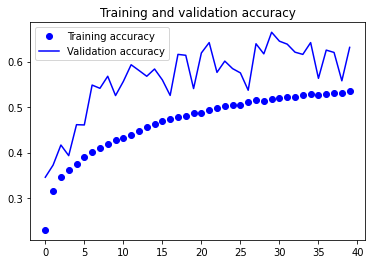

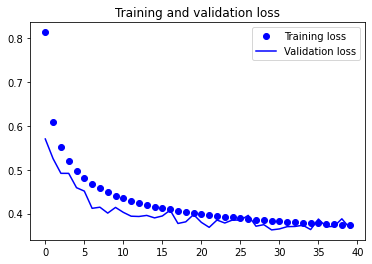

In [ ]:
import matplotlib.pyplot as plt

print(history.keys())
# see how the accuracy and the loss change during training
plt.title('ACCURACY')
plt.plot(history['accuracy'],'bo-',label = 'Training Accuracy')
plt.plot(history['val_accuracy'],'ro-',label = 'Validation Accuracy')
plt.legend()
plt.show()
plt.title('LOSS')
plt.plot(history['loss'],'bo-',label = 'Training Loss')
plt.plot(history['val_loss'],'ro-',label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_Y = model.predict(test_dataset, batch_size = 512, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)
y_true = tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)
y_true_cat = np.argmax(y_true, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(y_true_cat, pred_Y_cat)))
print(classification_report(y_true_cat, pred_Y_cat))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true_cat, pred_Y_cat), 
            annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues)